In [ ]:
# Import packages we will be using throughout the analysis. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# List of the collumn names to be added to dataframe

In [3]:
collumnNames = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"] 

In [4]:
# Reads in dataset as pandas dataframe and adds the collumn names to top

In [5]:
df = pd.read_csv('iris.txt', names = collumnNames)

In [ ]:
# Gives us the first 6 rows - in this case our collumn names we added and 5 rows of data. 

In [6]:
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Tells us how many rows (150) and collumns (5) we have. 

In [7]:
print(df.shape)

(150, 5)


In [ ]:
# Gives us information about df - it is a dataframe with 150 entries, no null values and the type of each collumns

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
# Overview of df statistics - count, mean, standard deviation, minimum value, 25% quartile, median, 75th quartile and maximum 
# by each numerical variable. 

In [9]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [ ]:
# We have 3 species in our dataset Setosa, Versicolor and Virginica. Each species type contains 50 data points. 

In [18]:
print(df["Species"].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [ ]:
# Calculates the mean, standard deviation, min, median and max by each species of flower for each variable. 

In [25]:
SepalLengthBySpecies = df.groupby("Species")["SepalLengthCm"].agg([np.mean, np.std, np.min, np.median, np.max])
print("Sepal Length\n", SepalLengthBySpecies, "\n")

SepalWidthBySpecies = df.groupby("Species")["SepalWidthCm"].agg([np.mean, np.std, np.min, np.median, np.max])
print("Sepal Width\n", SepalWidthBySpecies, "\n")

PetalLengthBySpecies = df.groupby("Species")["PetalLengthCm"].agg([np.mean, np.std, np.min, np.median, np.max])
print("Petal Length\n", PetalLengthBySpecies, "\n")

PetalWidthBySpecies = df.groupby("Species")["PetalWidthCm"].agg([np.mean, np.std, np.min, np.median, np.max])
print("Petal Width\n", PetalWidthBySpecies, "\n")

Sepal Length
                   mean       std  amin  median  amax
Species                                             
Iris-setosa      5.006  0.352490   4.3     5.0   5.8
Iris-versicolor  5.936  0.516171   4.9     5.9   7.0
Iris-virginica   6.588  0.635880   4.9     6.5   7.9 

Sepal Width
                   mean       std  amin  median  amax
Species                                             
Iris-setosa      3.418  0.381024   2.3     3.4   4.4
Iris-versicolor  2.770  0.313798   2.0     2.8   3.4
Iris-virginica   2.974  0.322497   2.2     3.0   3.8 

Petal Length
                   mean       std  amin  median  amax
Species                                             
Iris-setosa      1.464  0.173511   1.0    1.50   1.9
Iris-versicolor  4.260  0.469911   3.0    4.35   5.1
Iris-virginica   5.552  0.551895   4.5    5.55   6.9 

Petal Width
                   mean       std  amin  median  amax
Species                                             
Iris-setosa      0.244  0.107210   0.1 

In [ ]:
# Plots 4 histograms of each variable by each species. 
# Kde gives us an outline of the distribution species.  

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

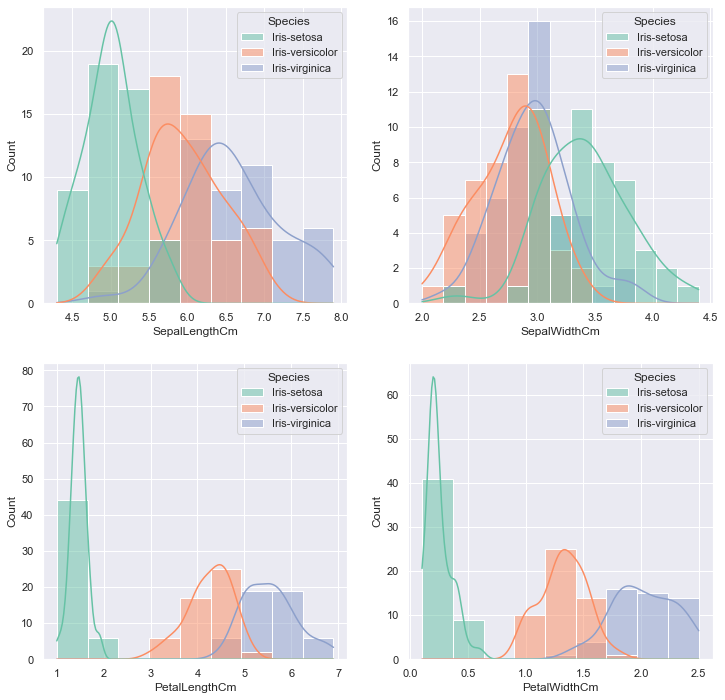

In [28]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df, x="SepalLengthCm", kde=True, ax=axs[0, 0], hue="Species", palette="Set2")
sns.histplot(data=df, x="SepalWidthCm", kde=True, ax=axs[0, 1], hue="Species", palette="Set2")
sns.histplot(data=df, x="PetalLengthCm", kde=True, ax=axs[1, 0], hue="Species", palette="Set2")
sns.histplot(data=df, x="PetalWidthCm", kde=True, ax=axs[1, 1], hue="Species", palette="Set2")
plt.show()